<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_36/blob/main/Reto_Aguas_subterraneas_Entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Ciencia y Analítica de Datos**
###Tecnológico de Monterrey
###Prof Titular: **Dra. María de la Paz Rico**
###Tutor: **Roberto Antonio Guevara González**

####**Equipo 36**
####*Marcos Chávez - A01688507*
####*Bernanrdo Mijangos - A01793654*

https://github.com/PosgradoMNA/actividades-del-projecto-equipo_36/blob/main/Reto_Aguas_subterraneas_Entrega1.ipynb

####*Fecha de entrega 16/11/2022*

####**Selección de la base con los datos de calidad de aguas subterráneas**

In [187]:
from sklearn import linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
import pandas as pd
import scipy as scp
import numpy as np
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split  ### for train and test split package
from sklearn import metrics  ## For calculation of MSE & RMSE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score

import requests, zipfile
from io import BytesIO

from sklearn.cluster import KMeans
from tqdm import tqdm
from shapely.geometry import Point
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
import geopy.distance

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors

Se procedió a realizar un análisis exploratorio de los datos.
<br>
Para el un entendimiento de los datos, se llevó a cabo el análisis
de las variables por tipo (categóricas y numéricas).

In [188]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

In [189]:
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


###**Variables**

####**Exploración inicial**

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [191]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [192]:
categoricas = ['CALIDAD_ALC',
                'CALIDAD_CONDUC',
                'CALIDAD_SDT_ra',
                'CALIDAD_SDT_salin',
                'CALIDAD_FLUO',
                'CALIDAD_DUR',
                'CALIDAD_COLI_FEC',
                'CALIDAD_N_NO3',
                'CALIDAD_AS',
                'CALIDAD_CD',
                'CALIDAD_CR',
                'CALIDAD_HG',
                'CALIDAD_PB',
                'CALIDAD_MN',
                'CALIDAD_FE']

mediciones = ['ALC_mg/L', 'CONDUCT_mS/cm',
              'SDT_M_mg/L', 'FLUORUROS_mg/L',
              'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
              'N_NO3_mg/L', 'AS_TOT_mg/L',
              'CD_TOT_mg/L', 'CR_TOT_mg/L',
              'HG_TOT_mg/L', 'PB_TOT_mg/L', 
              'MN_TOT_mg/L', 'FE_TOT_mg/L',]

coordenadas = ['LATITUD','LONGITUD']

binarias = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
            'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
            'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
            'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
            'CUMPLE_CON_FE']

calidad=['SEMAFORO']

#### **Variables categóricas**

In [193]:
df[categoricas].describe()

,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
count,1064,1062,1066,1066,1068,1067,1068,1067,1068,1068,1068,1068,1068,1068,1068
unique,4,5,5,4,4,4,5,3,3,2,2,2,2,3,2
top,Alta,Permisible para riego,Excelente para riego,Potable - Dulce,Baja,Potable - Dura,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
freq,794,460,491,834,434,577,739,788,816,1066,1053,1067,1056,982,932


Las variables de “CALIDAD” contienen entre 2 y 5 categorías cada una y contienen muy pocos valores faltantes.
<br>
Estos valores aparecen como “ND” en las variables de CUMPLIMIENTO y no fueron tomados en cuenta al momento de construir la variable de “SEMAFORO”.

In [194]:
df[categoricas].isnull().sum()

CALIDAD_ALC          4
CALIDAD_CONDUC       6
CALIDAD_SDT_ra       2
CALIDAD_SDT_salin    2
CALIDAD_FLUO         0
CALIDAD_DUR          1
CALIDAD_COLI_FEC     0
CALIDAD_N_NO3        1
CALIDAD_AS           0
CALIDAD_CD           0
CALIDAD_CR           0
CALIDAD_HG           0
CALIDAD_PB           0
CALIDAD_MN           0
CALIDAD_FE           0
dtype: int64

In [195]:
df1=df[df['CALIDAD_ALC'].isnull()]
print(df1[calidad])
print(df1[binarias])

    SEMAFORO
406     Rojo
407    Verde
722    Verde
861     Rojo
    CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
406             ND              SI                SI                   SI   
407             ND              SI                SI                   SI   
722             ND              SI                SI                   SI   
861             ND              SI                SI                   SI   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
406              SI             SI            SI             NO            SI   
407              SI             SI            SI             SI            SI   
722              SI             SI            SI             SI            SI   
861              NO             SI            SI             SI            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
406            SI            SI            SI            SI       

In [196]:
df1=df[df['CALIDAD_CONDUC'].isnull()]
print(df1[calidad])
print(df1[binarias])

     SEMAFORO
18       Rojo
281     Verde
293      Rojo
616  Amarillo
891     Verde
906     Verde
    CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
18              SI              ND                SI                   SI   
281             SI              ND                SI                   SI   
293             NO              ND                SI                   SI   
616             NO              ND                NO                   NO   
891             SI              ND                SI                   SI   
906             SI              ND                SI                   SI   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
18               SI             SI            SI             SI            NO   
281              SI             SI            SI             SI            SI   
293              NO             SI            SI             SI            NO   
616              SI             NO    

In [197]:
df1=df[df['CALIDAD_SDT_ra'].isnull()]
print(df1[calidad])
print(df1[binarias])

     SEMAFORO
175      Rojo
677  Amarillo
    CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
175             SI              SI                ND                   ND   
677             SI              SI                ND                   ND   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
175              SI             SI            SI             NO            SI   
677              SI             SI            SI             SI            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
175            SI            SI            SI            SI            SI   
677            SI            SI            SI            SI            SI   

    CUMPLE_CON_FE  
175            SI  
677            NO  


In [198]:
df1=df[df['CALIDAD_SDT_salin'].isnull()]
print(df1[calidad])
print(df1[binarias])

     SEMAFORO
175      Rojo
677  Amarillo
    CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
175             SI              SI                ND                   ND   
677             SI              SI                ND                   ND   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
175              SI             SI            SI             NO            SI   
677              SI             SI            SI             SI            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
175            SI            SI            SI            SI            SI   
677            SI            SI            SI            SI            SI   

    CUMPLE_CON_FE  
175            SI  
677            NO  


In [199]:
df1=df[df['CALIDAD_DUR'].isnull()]
print(df1[calidad])
print(df1[binarias])

    SEMAFORO
635    Verde
    CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
635             SI              SI                SI                   SI   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
635              SI             ND            SI             SI            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
635            SI            SI            SI            SI            SI   

    CUMPLE_CON_FE  
635            SI  


In [200]:
df1=df[df['CALIDAD_N_NO3'].isnull()]
print(df1[calidad])
print(df1[binarias])

    SEMAFORO
234    Verde
    CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
234             SI              SI                SI                   SI   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
234              SI             SI            SI             ND            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
234            SI            SI            SI            SI            SI   

    CUMPLE_CON_FE  
234            SI  


####**Variables con mediciones (numéricas)**

Se analizaron las 14 variables numéricas y se tomo la decisión de realizar las siguientes acciones para cada una de ellas:

* Sustituir los “strings” que aparecen con datos numéricos congruentes.
* Imputar los datos faltantes con la mediana
* Reducir la magnitud de los outliers.

#####**Variable [ALC_mg/L]**

-*Imputación de valores faltantes*
<br>
-*Reducción de magnitud de Outliers*

In [201]:
df['ALC_mg/L'].isnull().sum()

4

In [202]:
#Imputamos la variable con la mediana
df['ALC_mg/L'].fillna(df['ALC_mg/L'].median(), inplace=True)

In [203]:
df['ALC_mg/L'].isnull().sum()

0

In [204]:
df['ALC_mg/L'].describe()

count    1068.000000
mean      235.558455
std       116.661485
min        26.640000
25%       164.048750
50%       215.527500
75%       292.423750
max      1650.000000
Name: ALC_mg/L, dtype: float64

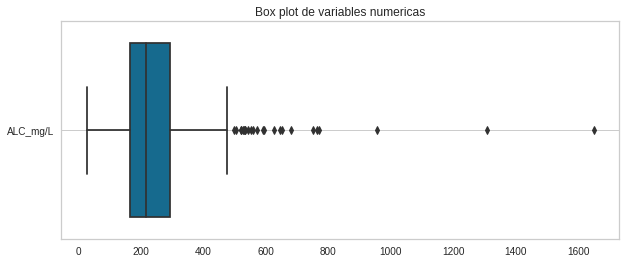

In [205]:
#Detección de outliers con boxplot
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['ALC_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [206]:
df[df['ALC_mg/L'] > 500]['ALC_mg/L'].count()

23

In [207]:
df.loc[df['ALC_mg/L'] > 500, 'ALC_mg/L'] = 500

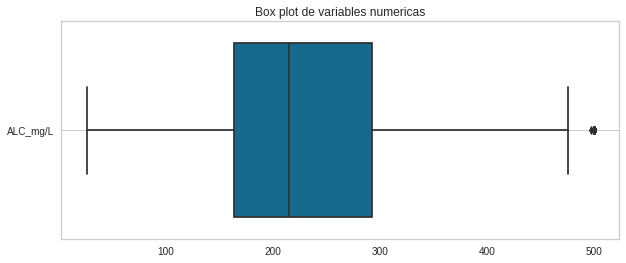

In [208]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['ALC_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [CONDUCT_mS/cm]**

-*Imputación de valores faltantes*
<br>
-*Reducción de magnitud de Outliers*

In [209]:
df['CONDUCT_mS/cm'].isnull().sum()

6

In [210]:
#Imputamos la variable con la mediana
df['CONDUCT_mS/cm'].fillna(df['CONDUCT_mS/cm'].median(), inplace=True)

In [211]:
df['CONDUCT_mS/cm'].isnull().sum()

0

In [212]:
df['CONDUCT_mS/cm'].describe()

count     1068.000000
mean      1137.133052
std       1242.292889
min         50.400000
25%        505.500000
50%        815.000000
75%       1321.250000
max      18577.000000
Name: CONDUCT_mS/cm, dtype: float64

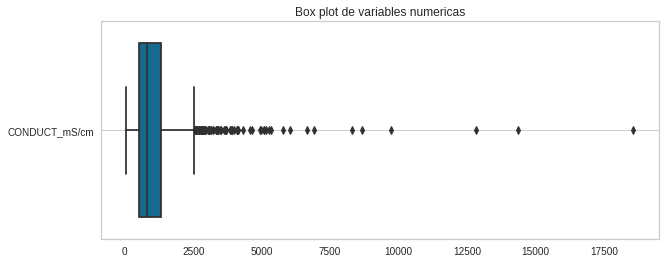

In [213]:

fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['CONDUCT_mS/cm']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [214]:
df[df['CONDUCT_mS/cm'] > 2600]['CONDUCT_mS/cm'].count()

76

In [215]:

df.loc[df['CONDUCT_mS/cm'] > 2600, 'CONDUCT_mS/cm']=2600

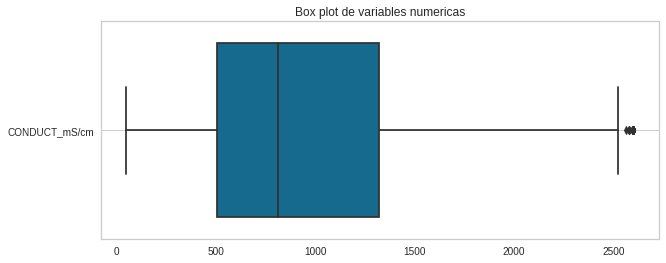

In [216]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['CONDUCT_mS/cm']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [SDT_M_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Imputación de valores faltantes*
<br>
-*Reducción de magnitud de Outliers*

In [217]:
df['SDT_M_mg/L'].sort_values(ascending=False).head()

407         <25
14        999.8
486    997.3333
362         988
31          988
Name: SDT_M_mg/L, dtype: object

In [218]:
#Sustitución de string categíco por valor

df.loc[df['SDT_M_mg/L'] == '<25' , 'SDT_M_mg/L']='24.9'


In [219]:
# cambio de string a numerico
df['SDT_M_mg/L'] = pd.to_numeric(df['SDT_M_mg/L'])

In [220]:
#Numero de valores nulos
df['SDT_M_mg/L'].isnull().sum()

2

In [221]:
# Imputamos la variable con la mediana
df['SDT_M_mg/L'].fillna(df['SDT_M_mg/L'].median(), inplace=True)


In [222]:
df['SDT_M_mg/L'].isnull().sum()

0

In [223]:
df['SDT_M_mg/L'].describe()

count     1068.000000
mean       895.454092
std       2748.991324
min         24.900000
25%        337.700000
50%        550.400000
75%        915.900000
max      82170.000000
Name: SDT_M_mg/L, dtype: float64

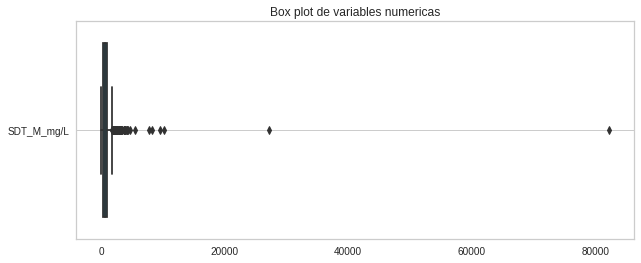

In [224]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['SDT_M_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [225]:
df[df['SDT_M_mg/L'] > 1900]['SDT_M_mg/L'].count()

80

In [226]:
df.loc[df['SDT_M_mg/L'] > 1900, 'SDT_M_mg/L']=1900

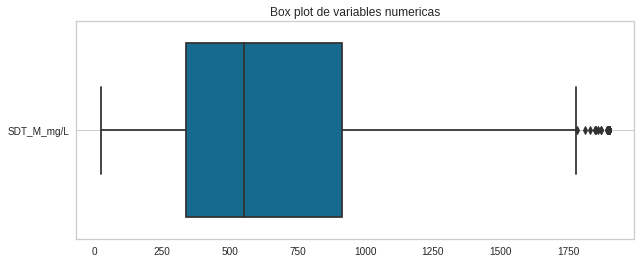

In [227]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['SDT_M_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [FLUORUROS_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Imputación de valores faltantes*
<br>
-*Reducción de magnitud de Outliers*

In [228]:
df['FLUORUROS_mg/L'].sort_values(ascending=False).head()

912    <0.2
954    <0.2
325    <0.2
327    <0.2
328    <0.2
Name: FLUORUROS_mg/L, dtype: object

In [229]:
# cambio de string a numerico
df.loc[df['FLUORUROS_mg/L'] == '<0.2' , 'FLUORUROS_mg/L']='0.199'

In [230]:
# Conversión a numéricos
df['FLUORUROS_mg/L'] = pd.to_numeric(df['FLUORUROS_mg/L'])

In [231]:
df['FLUORUROS_mg/L'].isnull().sum()

0

In [232]:
df['FLUORUROS_mg/L'].describe()

count    1068.000000
mean        1.075448
std         1.924348
min         0.199000
25%         0.267175
50%         0.503500
75%         1.139850
max        34.803300
Name: FLUORUROS_mg/L, dtype: float64

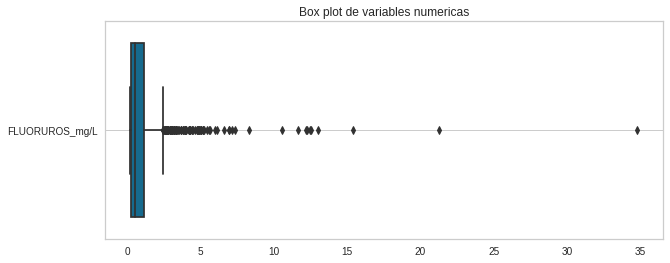

In [233]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['FLUORUROS_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [234]:
df[df['FLUORUROS_mg/L'] > 3]['FLUORUROS_mg/L'].count()

74

In [235]:
df.loc[df['FLUORUROS_mg/L'] > 3, 'FLUORUROS_mg/L']=3

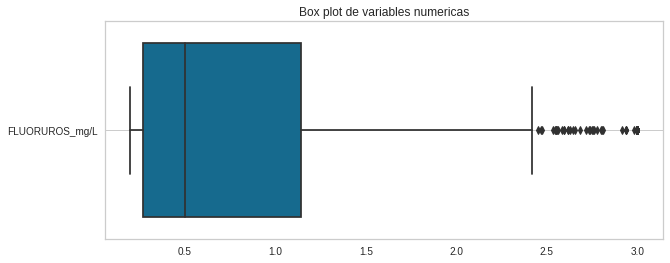

In [236]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['FLUORUROS_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [DUR_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Imputación de valores faltantes*
<br>
-*Reducción de magnitud de Outliers*

In [237]:
df['DUR_mg/L'].sort_values(ascending=False).head()

830    <20
210    <20
779    <20
116    <20
784    <20
Name: DUR_mg/L, dtype: object

In [238]:
df.loc[df['DUR_mg/L'] == '<20' , 'DUR_mg/L']='19.9'

In [239]:
# convertimos a numerico
df['DUR_mg/L'] = pd.to_numeric(df['DUR_mg/L'])

In [240]:
df['DUR_mg/L'].isnull().sum()

1

In [241]:
# Imputamos la variable con la media
df['DUR_mg/L'].fillna(df['DUR_mg/L'].median(), inplace=True)

In [242]:
df['DUR_mg/L'].isnull().sum()

0

In [243]:
df['DUR_mg/L'].describe()

count    1068.000000
mean      347.839569
std       359.516802
min        19.900000
25%       121.274100
50%       245.335800
75%       453.930000
max      3810.692200
Name: DUR_mg/L, dtype: float64

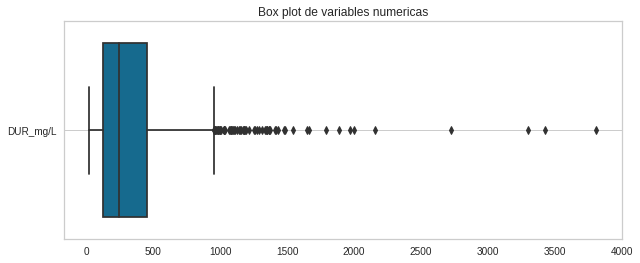

In [244]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['DUR_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [245]:
df[df['DUR_mg/L'] > 1000]['DUR_mg/L'].count()

53

In [246]:
# reducimos los outliers

df.loc[df['DUR_mg/L'] >1000 , 'DUR_mg/L'] = 1000

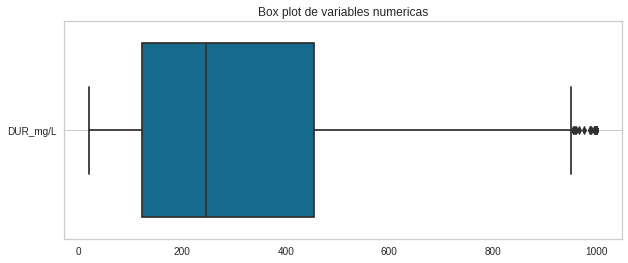

In [247]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['DUR_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [N_NO3_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Imputación de valores faltantes*
<br>
-*Reducción de magnitud de Outliers*

In [248]:
df['N_NO3_mg/L'].sort_values(ascending=False).head()

906    <0.02
505    <0.02
432    <0.02
436    <0.02
437    <0.02
Name: N_NO3_mg/L, dtype: object

In [249]:
df.loc[df['N_NO3_mg/L'] == '<0.02' , 'N_NO3_mg/L']='0.019'

In [250]:
# convertimos a numerico
df['N_NO3_mg/L'] = pd.to_numeric(df['N_NO3_mg/L'])

In [251]:
df['N_NO3_mg/L'].isnull().sum()

1

In [252]:
# Imputamos la variable con la mediana
df['N_NO3_mg/L'].fillna(df['N_NO3_mg/L'].median(), inplace=True)

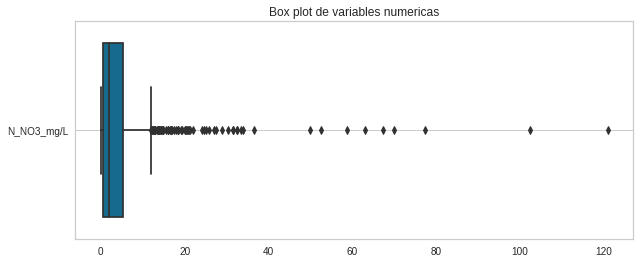

In [253]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['N_NO3_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [254]:
df[df['N_NO3_mg/L'] > 13]['N_NO3_mg/L'].count()

60

In [255]:
# reducimos los outliers

df.loc[df['N_NO3_mg/L'] >13 , 'N_NO3_mg/L']=13

In [256]:
df['N_NO3_mg/L'].describe()

count    1068.000000
mean        3.440016
std         3.681026
min         0.019000
25%         0.650932
50%         2.080932
75%         5.200047
max        13.000000
Name: N_NO3_mg/L, dtype: float64

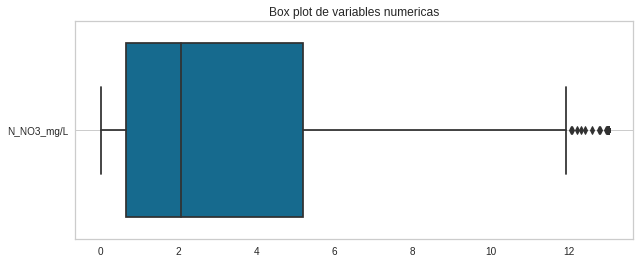

In [257]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['N_NO3_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

######**Variable [COLI_FEC_NMP/100_mL]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Reducción de magnitud de Outliers*

In [258]:
df['COLI_FEC_NMP/100_mL'].sort_values(ascending=False).head()

0      <1.1
644    <1.1
630    <1.1
632    <1.1
633    <1.1
Name: COLI_FEC_NMP/100_mL, dtype: object

In [259]:
df.loc[df['COLI_FEC_NMP/100_mL'] == '<1.1' , 'COLI_FEC_NMP/100_mL']='1'

In [260]:
# convertimos a numerico
df['COLI_FEC_NMP/100_mL'] = pd.to_numeric(df['COLI_FEC_NMP/100_mL'])

In [261]:
#Detección de nulos
df['COLI_FEC_NMP/100_mL'].isnull().sum()

0

In [262]:
df['COLI_FEC_NMP/100_mL'].describe()

count     1068.000000
mean       355.421348
std       2052.468941
min          1.000000
25%          1.000000
50%          1.000000
75%         13.250000
max      24196.000000
Name: COLI_FEC_NMP/100_mL, dtype: float64

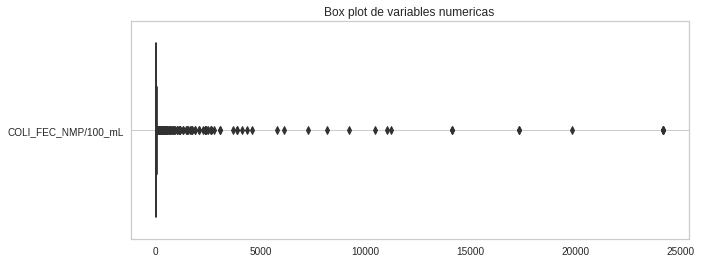

In [263]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['COLI_FEC_NMP/100_mL']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [264]:
df[df['COLI_FEC_NMP/100_mL'] > 500]['COLI_FEC_NMP/100_mL'].count()

75

In [265]:
# reducimos los outliers

df.loc[df['COLI_FEC_NMP/100_mL'] >500 , 'COLI_FEC_NMP/100_mL']=500

In [266]:
df['COLI_FEC_NMP/100_mL'].describe()

count    1068.000000
mean       58.729401
std       140.122168
min         1.000000
25%         1.000000
50%         1.000000
75%        13.250000
max       500.000000
Name: COLI_FEC_NMP/100_mL, dtype: float64

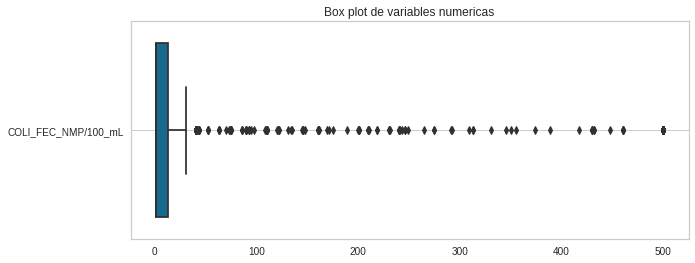

In [267]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['COLI_FEC_NMP/100_mL']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [AS_TOT_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Reducción de magnitud de Outliers*

In [268]:
df['AS_TOT_mg/L'].sort_values(ascending=False).head()

534    <0.01
682    <0.01
696    <0.01
697    <0.01
698    <0.01
Name: AS_TOT_mg/L, dtype: object

In [269]:
df.loc[df['AS_TOT_mg/L'] == '<0.01' , 'AS_TOT_mg/L']='0.009'

In [270]:
# convertimos a numerico
df['AS_TOT_mg/L'] = pd.to_numeric(df['AS_TOT_mg/L'])

In [271]:
df['AS_TOT_mg/L'].isnull().sum()

0

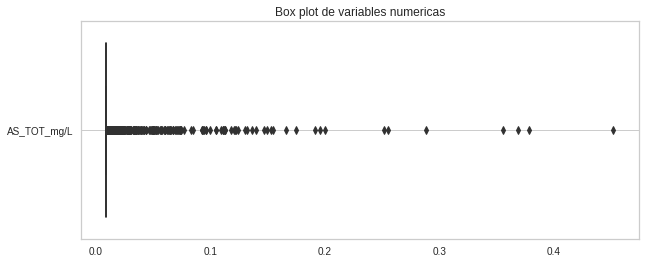

In [272]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['AS_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [273]:
df[df['AS_TOT_mg/L'] > 0.05]['AS_TOT_mg/L'].count()

78

In [274]:
# reducimos los outliers

df.loc[df['AS_TOT_mg/L'] > 0.05 , 'AS_TOT_mg/L']=.05

In [275]:
df['AS_TOT_mg/L'].describe()

count    1068.000000
mean        0.014077
std         0.011838
min         0.009000
25%         0.009000
50%         0.009000
75%         0.009000
max         0.050000
Name: AS_TOT_mg/L, dtype: float64

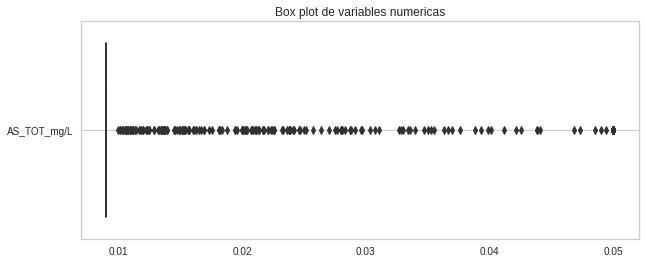

In [276]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['AS_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [CD_TOT_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Reducción de magnitud de Outliers*

In [277]:
df['CD_TOT_mg/L'].sort_values(ascending=False).head()

0      <0.003
717    <0.003
703    <0.003
704    <0.003
705    <0.003
Name: CD_TOT_mg/L, dtype: object

In [278]:
df.loc[df['CD_TOT_mg/L'] == '<0.003' , 'CD_TOT_mg/L']='0.0029'

In [279]:
# convertimos a numerico
df['CD_TOT_mg/L'] = pd.to_numeric(df['CD_TOT_mg/L'])

In [280]:
#Detección de valores nulos
df['CD_TOT_mg/L'].isnull().sum()

0

In [281]:
df['CD_TOT_mg/L'].describe()

count    1068.000000
mean        0.002930
std         0.000898
min         0.002900
25%         0.002900
50%         0.002900
75%         0.002900
max         0.032110
Name: CD_TOT_mg/L, dtype: float64

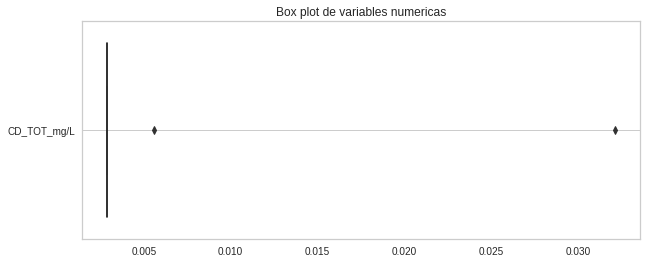

In [282]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['CD_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [283]:
df[df['CD_TOT_mg/L'] > 0.0029]['CD_TOT_mg/L'].count()

2

In [284]:
# reducimos los outliers

df.loc[df['CD_TOT_mg/L'] > 0.0029 , 'CD_TOT_mg/L']= 0.003

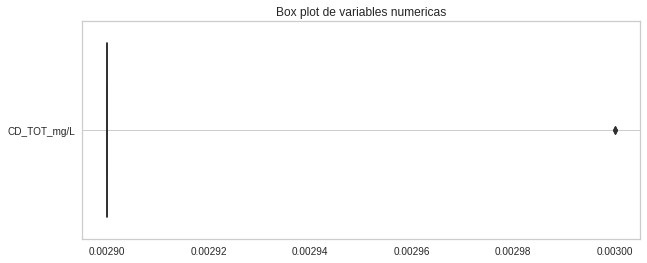

In [285]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['CD_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [CR_TOT_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Reducción de magnitud de Outliers*

In [286]:
df['CR_TOT_mg/L'].sort_values(ascending=False).head()

0      <0.005
680    <0.005
668    <0.005
669    <0.005
670    <0.005
Name: CR_TOT_mg/L, dtype: object

In [287]:
df.loc[df['CR_TOT_mg/L'] == '<0.005' , 'CR_TOT_mg/L']='0.0049'

In [288]:
# convertimos a numerico
df['CR_TOT_mg/L'] = pd.to_numeric(df['CR_TOT_mg/L'])

In [289]:
df['CR_TOT_mg/L'].isnull().sum()

0

In [290]:
df['CR_TOT_mg/L'].describe()

count    1068.000000
mean        0.013196
std         0.154396
min         0.004900
25%         0.004900
50%         0.004900
75%         0.004900
max         5.003200
Name: CR_TOT_mg/L, dtype: float64

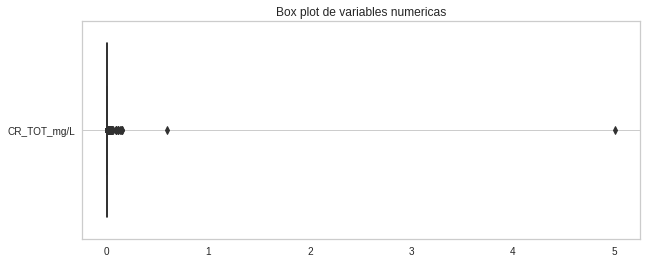

In [291]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['CR_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [292]:
df[df['CR_TOT_mg/L'] > 0.02]['CD_TOT_mg/L'].count()

61

In [293]:
df.loc[df['CR_TOT_mg/L'] > 0.02 , 'CR_TOT_mg/L']= 0.02

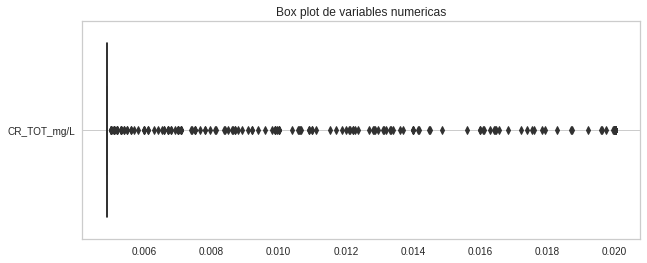

In [294]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['CR_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [HG_TOT_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Reducción de magnitud de Outliers*



In [295]:
df['HG_TOT_mg/L'].sort_values(ascending=False).head()

0      <0.0005
659    <0.0005
693    <0.0005
694    <0.0005
695    <0.0005
Name: HG_TOT_mg/L, dtype: object

In [296]:
df.loc[df['HG_TOT_mg/L'] == '<0.0005' , 'HG_TOT_mg/L']='0.00049'

In [297]:
# convertimos a numerico
df['HG_TOT_mg/L'] = pd.to_numeric(df['HG_TOT_mg/L'])

In [298]:
df['HG_TOT_mg/L'].isnull().sum()

0

In [299]:
df['HG_TOT_mg/L'].describe()

count    1068.000000
mean        0.000548
std         0.000468
min         0.000490
25%         0.000490
50%         0.000490
75%         0.000490
max         0.014150
Name: HG_TOT_mg/L, dtype: float64

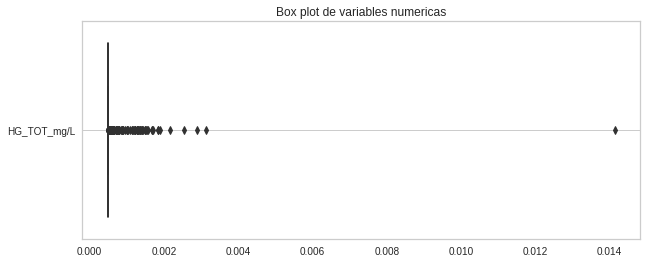

In [300]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['HG_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [301]:
df[df['HG_TOT_mg/L'] > 0.001]['HG_TOT_mg/L'].count()

39

In [302]:
df.loc[df['HG_TOT_mg/L'] > 0.001 , 'HG_TOT_mg/L']= 0.001

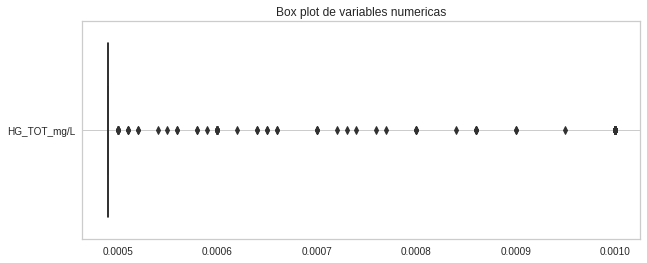

In [303]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['HG_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [PB_TOT_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Reducción de magnitud de Outliers*

In [304]:
df['PB_TOT_mg/L'].sort_values(ascending=False).head()

0      <0.005
712    <0.005
698    <0.005
699    <0.005
700    <0.005
Name: PB_TOT_mg/L, dtype: object

In [305]:
df.loc[df['PB_TOT_mg/L'] == '<0.005' , 'PB_TOT_mg/L']='0.0049'

In [306]:
# convertimos a numerico
df['PB_TOT_mg/L'] = pd.to_numeric(df['PB_TOT_mg/L'])

In [307]:
df['PB_TOT_mg/L'].isnull().sum()

0

In [308]:
df['PB_TOT_mg/L'].describe()

count    1068.000000
mean        0.005184
std         0.003263
min         0.004900
25%         0.004900
50%         0.004900
75%         0.004900
max         0.080900
Name: PB_TOT_mg/L, dtype: float64

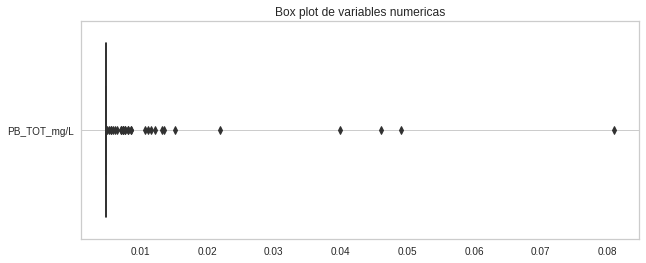

In [309]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['PB_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [310]:
df[df['PB_TOT_mg/L'] > 0.005]['PB_TOT_mg/L'].count()

29

In [311]:
df.loc[df['PB_TOT_mg/L'] > 0.005 , 'PB_TOT_mg/L']= 0.005

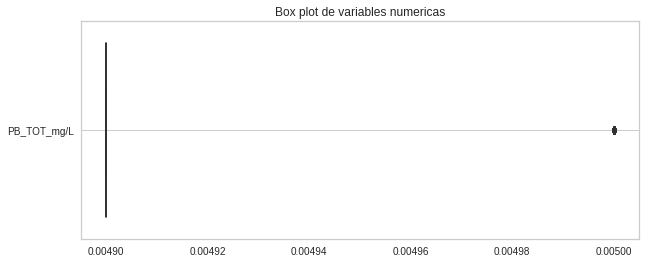

In [312]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['PB_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [MN_TOT_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Reducción de magnitud de Outliers*


In [313]:
df['MN_TOT_mg/L'].sort_values(ascending=False).head()

0      <0.0015
584    <0.0015
555    <0.0015
557    <0.0015
558    <0.0015
Name: MN_TOT_mg/L, dtype: object

In [314]:
df.loc[df['MN_TOT_mg/L'] == '<0.0015' , 'MN_TOT_mg/L']='0.0014'

In [315]:
# convertimos a numerico
df['MN_TOT_mg/L'] = pd.to_numeric(df['MN_TOT_mg/L'])

In [316]:
df['MN_TOT_mg/L'].isnull().sum()

0

In [317]:
df['MN_TOT_mg/L'].describe()

count    1068.000000
mean        0.072427
std         0.376522
min         0.001400
25%         0.001400
50%         0.001400
75%         0.009947
max         8.982000
Name: MN_TOT_mg/L, dtype: float64

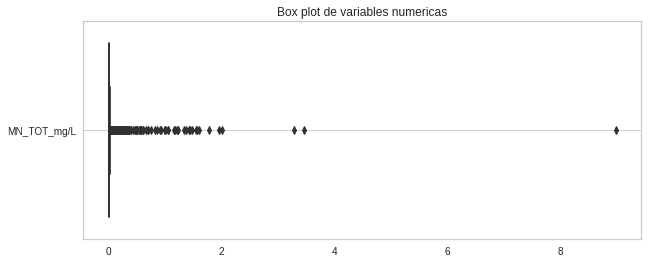

In [318]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['MN_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [319]:
df[df['MN_TOT_mg/L'] > 0.1]['MN_TOT_mg/L'].count()

92

In [320]:
df.loc[df['MN_TOT_mg/L'] > 0.1, 'MN_TOT_mg/L']= 0.1

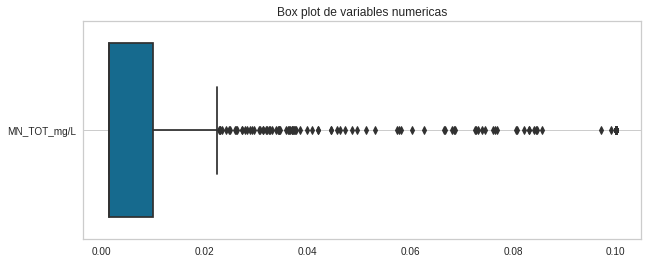

In [321]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['MN_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

#####**Variable [FE_TOT_mg/L]**

-*Sustituir categoría en variable por valor convencional*
<br>
-*Reducción de magnitud de Outliers*

In [322]:
df['FE_TOT_mg/L'].sort_values(ascending=False).head()

1067    <0.025
831     <0.025
837     <0.025
838     <0.025
840     <0.025
Name: FE_TOT_mg/L, dtype: object

In [323]:
df.loc[df['FE_TOT_mg/L'] == '<0.025' , 'FE_TOT_mg/L']='0.024'

In [324]:
# convertimos a numerico
df['FE_TOT_mg/L'] = pd.to_numeric(df['FE_TOT_mg/L'])

In [325]:
df['FE_TOT_mg/L'].isnull().sum()

0

In [326]:
df['FE_TOT_mg/L'].describe()

count    1068.000000
mean        0.410012
std         5.538000
min         0.024000
25%         0.024000
50%         0.046960
75%         0.173380
max       178.615000
Name: FE_TOT_mg/L, dtype: float64

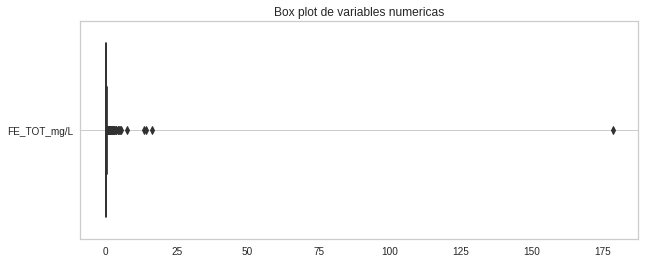

In [327]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['FE_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

In [328]:
df[df['FE_TOT_mg/L'] > 0.5]['FE_TOT_mg/L'].count()

84

In [329]:
df.loc[df['FE_TOT_mg/L'] > 0.5, 'FE_TOT_mg/L']= 0.5

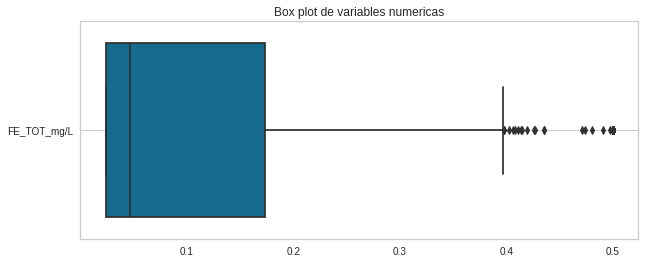

In [330]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['FE_TOT_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

####**Variables con coordenadas**

Sin datos faltanes

In [331]:
df[coordenadas].describe()

,LATITUD,LONGITUD
count,1068.000000,1068.000000
mean,23.163618,-101.891007
std,3.887670,6.703263
min,14.561150,-116.664250
25%,20.212055,-105.388865
50%,22.617190,-102.174180
75%,25.510285,-98.974716
max,32.677713,-86.864120


####**Variables binarias**

Sin datos faltanes

####**Variable de calidad (semáforo)**

Sin datos faltanes

In [332]:
df[calidad].count()

SEMAFORO    1068
dtype: int64

In [333]:
df[calidad].isnull().sum()

SEMAFORO    0
dtype: int64

In [334]:
df[calidad].value_counts()/1068*100

SEMAFORO
Verde       40.636704
Rojo        36.235955
Amarillo    23.127341
dtype: float64

##**Análisis relación calidad del agua - ubicación geográfica**

In [335]:
!pip install geopandas
import geopandas as gpd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Selección de numero de Clusters**

Con base en la evidencia y método del codo se toma la decisión de quedarnos con 3 clusters. 

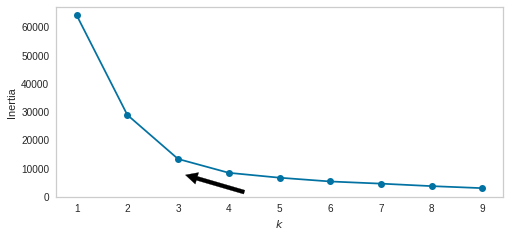

In [336]:
X_cluster = df[['LATITUD', 'LONGITUD']]

kmeans_per_k = [KMeans(n_clusters=k, random_state=62).fit(X_cluster)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(3, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.grid()
plt.show()

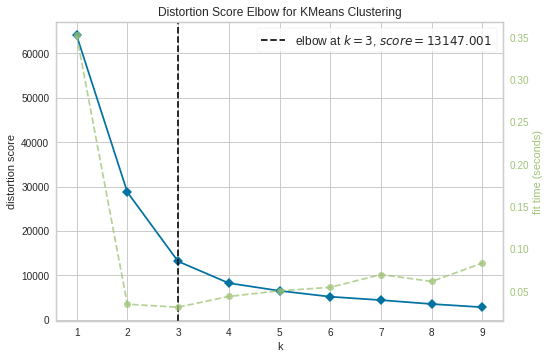

In [337]:
vzr = KElbowVisualizer(KMeans(n_clusters=3, random_state=62), k=(1, 10))
vzr.fit(X_cluster)
vzr.poof()

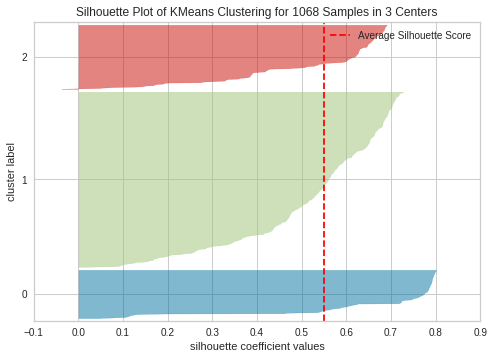

In [338]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3, random_state=62), colors='yellowbrick')
visualizer.fit(X_cluster)        
visualizer.show()       

In [339]:
df["Coordinates"] = list(zip(df.LONGITUD , df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [340]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)


In [341]:
X_cluster = gdf[['LATITUD', 'LONGITUD']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_cluster)
y_kmeans = kmeans.predict(X_cluster)

In [342]:
#graficar el mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [343]:
#graficar el mapa
#world.name.unique()

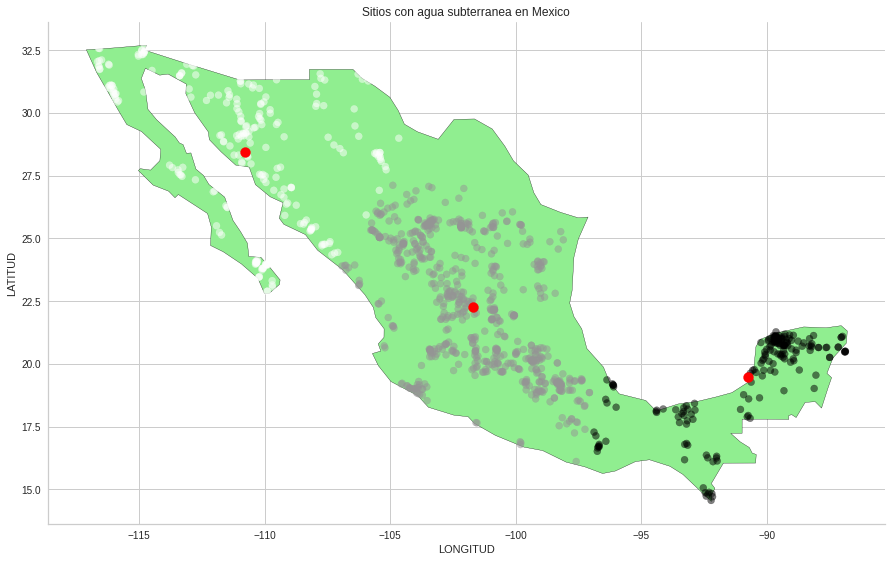

In [344]:
fig, gax = plt.subplots(figsize=(15,15))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='lightgreen')
gdf.plot(ax=gax, c=y_kmeans, alpha = 0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=100)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Sitios con agua subterranea en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [345]:
df['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [346]:
df.loc[df['SEMAFORO'] == 'Verde' , 'SEMAFORO']='0'
df.loc[df['SEMAFORO'] == 'Amarillo' , 'SEMAFORO']='1'
df.loc[df['SEMAFORO'] == 'Rojo' , 'SEMAFORO']='2'

In [347]:
# convertimos a numerico
df['SEMAFORO'] = pd.to_numeric(df['SEMAFORO'])

In [348]:
from pandas.core.indexing import pd_array

semaforo = pd_array(df['SEMAFORO'])

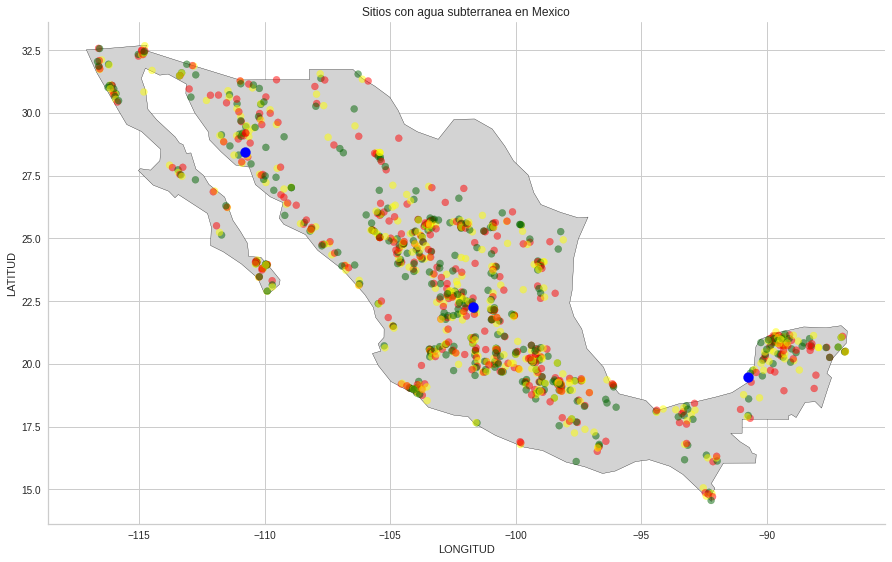

In [349]:
fig, gax = plt.subplots(figsize=(15,15))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='lightgrey')
gdf.plot(ax=gax, c=semaforo, alpha = 0.5, cmap=ListedColormap(["darkgreen", "yellow", "red"]))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='blue', s=100)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Sitios con agua subterranea en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [350]:
list_values = pd.DataFrame(y_kmeans).value_counts().to_list()

In [351]:
list_values

[650, 238, 180]

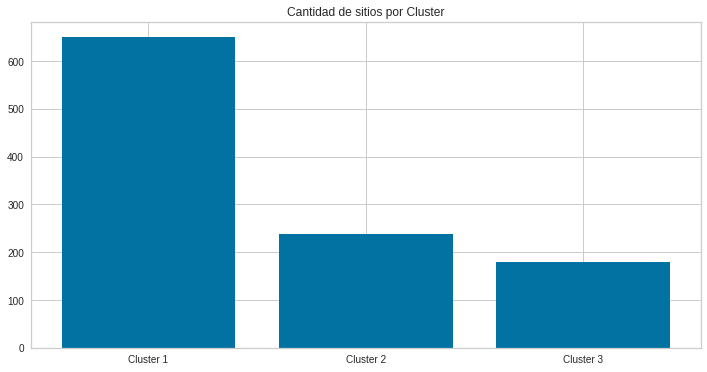

In [352]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']
list_values = pd.DataFrame(y_kmeans).value_counts().to_list()
axs.bar(list_names, list_values)
plt.title('Cantidad de sitios por Cluster')
plt.show()

In [353]:
dfck = pd.DataFrame()
dfck['Cluster']=pd.DataFrame(y_kmeans,)
dfck['Semaforo']=df['SEMAFORO']



In [354]:
dfck_0 = dfck[dfck['Cluster']==0]
dfck_1 = dfck[dfck['Cluster']==1]
dfck_2 = dfck[dfck['Cluster']==2]

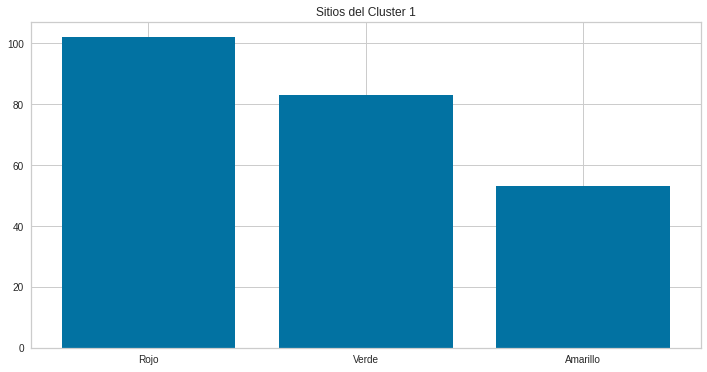

In [357]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Rojo', 'Verde', 'Amarillo']
list_values = dfck_0.value_counts().to_list()
axs.bar(list_names, list_values)
plt.title('Sitios del Cluster 1')
plt.show()

In [356]:
dfck_0['Semaforo'].value_counts()

0    102
2     83
1     53
Name: Semaforo, dtype: int64

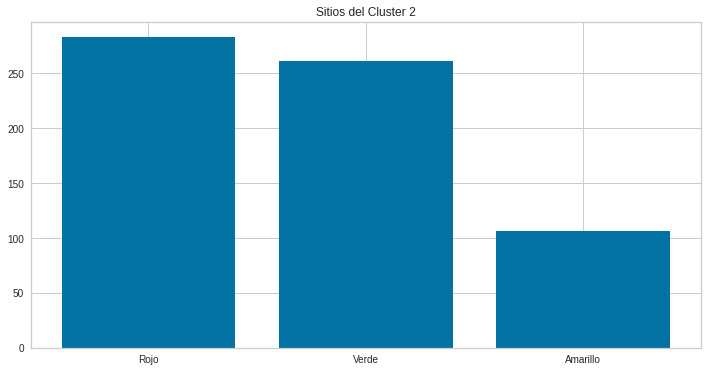

In [358]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Rojo', 'Verde', 'Amarillo']
list_values = dfck_1.value_counts().to_list()
axs.bar(list_names, list_values)
plt.title('Sitios del Cluster 2')
plt.show()

In [359]:
dfck_1['Semaforo'].value_counts()

2    283
0    261
1    106
Name: Semaforo, dtype: int64

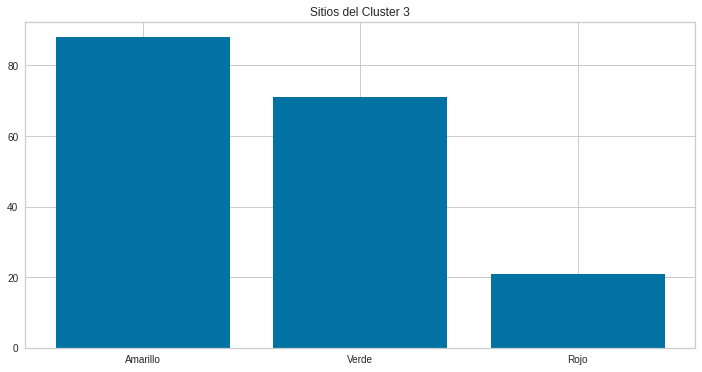

In [360]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Amarillo', 'Verde',  'Rojo']
list_values = dfck_2.value_counts().to_list()
axs.bar(list_names, list_values)
plt.title('Sitios del Cluster 3')
plt.show()

In [361]:
dfck_2['Semaforo'].value_counts()

1    88
0    71
2    21
Name: Semaforo, dtype: int64

###*Conclusiones*

El cluster 1 (Centro) es el que concentra la mayor parte de sitios (61%), mientras que el cluster 2 (Norte) concentra el 22% y el sur el 17%.

Vale la pena destacar que en el cluster de la zona centro concentra el 73% de los sitios con semáforo rojo, porcentaje superior a su tamaño del cluster 61% y un bajo porcentaje de sitios con semáforo amarillo, es decir, el 43% del total.

*El Cluster de la zona norte es el más equilibrado, ya que la proporción de pozos por color del semáforo es consitente, por ejemplo, los sitios con semáforo verde representan el 24%, los rojo el 21% y los verdes el 21% del total respectivamente.* 

Finalmente el cluster más pequeño al sur del país, concentra una proporción más alta de sitios en amarillo (35% del total) y una baja proporción de sitos en rojo (sólo 6%) comparado con su tamaño.

**De lo anterior podemos afirmar que si bien el centro del país concentra la mayor cantidad de sitios, muchos de estos están clasificados con semáforo rojo (Mala calidad). Mientras que al sur del país hay menos sitios, pero su inmensa mayoría se encuentran en semáforo verde o amarillo (Calidad buena y aceptable).**